In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv('/content/train.csv') 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.2, random_state=42)



In [3]:
# Text vectorization using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Transform the word counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [4]:
# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))


Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4030
           1       1.00      0.07      0.13       291

    accuracy                           0.94      4321
   macro avg       0.97      0.53      0.55      4321
weighted avg       0.94      0.94      0.91      4321

Accuracy: 0.9372830363341819


In [5]:
# SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))


SVM Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4030
           1       0.94      0.31      0.46       291

    accuracy                           0.95      4321
   macro avg       0.94      0.65      0.72      4321
weighted avg       0.95      0.95      0.94      4321

Accuracy: 0.9518629946771581


In [6]:
# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train)
dt_predictions = dt_classifier.predict(X_test_tfidf)

print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4030
           1       0.59      0.53      0.56       291

    accuracy                           0.94      4321
   macro avg       0.78      0.75      0.76      4321
weighted avg       0.94      0.94      0.94      4321

Accuracy: 0.9433001619995371


In [9]:
from sklearn.metrics import classification_report
import numpy as np

classifiers = ['Naive Bayes', 'SVM', 'Decision Tree']
reports = [classification_report(y_test, nb_predictions),
           classification_report(y_test, svm_predictions),
           classification_report(y_test, dt_predictions)]

# Initialize arrays to store precision, recall, and F1-score values
precision = np.zeros((len(classifiers), len(set(y_test))), dtype=float)
recall = np.zeros((len(classifiers), len(set(y_test))), dtype=float)
f1_score = np.zeros((len(classifiers), len(set(y_test))), dtype=float)

# Parse the classification reports and store the scores
for i, report in enumerate(reports):
    report_lines = report.split('\n')[2:-5]
    for j, line in enumerate(report_lines):
        line_parts = line.split()
        if len(line_parts) == 5:
            precision[i, j] = float(line_parts[1])
            recall[i, j] = float(line_parts[2])
            f1_score[i, j] = float(line_parts[3])


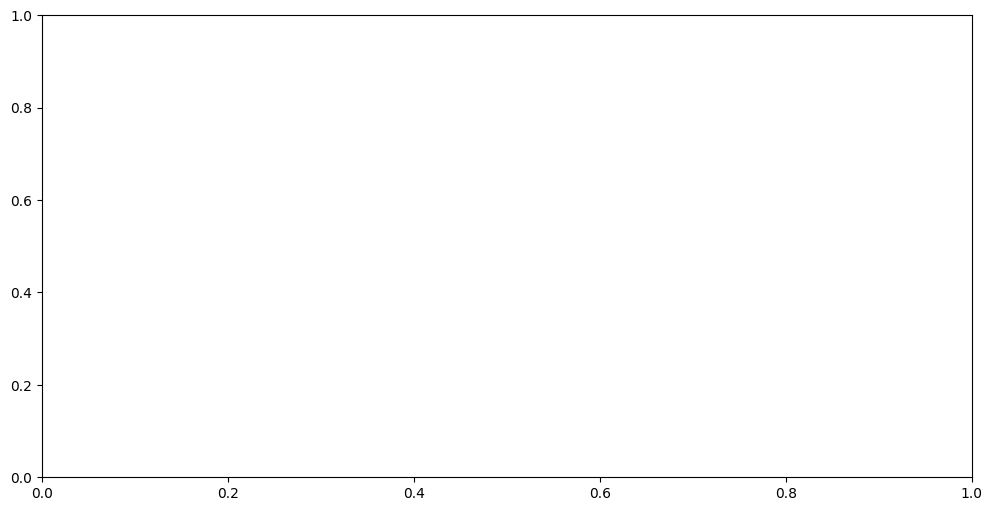

In [10]:
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(classifiers))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']


In [11]:
# Plot precision, recall, and F1-score for each class and each classifier
for i in range(len(set(y_test))):
    bar_offset = i * bar_width
    ax.bar(index + bar_offset, precision[:, i], bar_width, label=f'Class {i+1} - Precision', color=colors[i])
    ax.bar(index + bar_offset + bar_width, recall[:, i], bar_width, label=f'Class {i+1} - Recall', color=colors[i], alpha=0.5)
    ax.bar(index + bar_offset + 2 * bar_width, f1_score[:, i], bar_width, label=f'Class {i+1} - F1-Score', color=colors[i], alpha=0.8)

# Configure the plot
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Classification Report')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classifiers)
ax.legend(loc='lower right')
ax.grid(True)

plt.show()


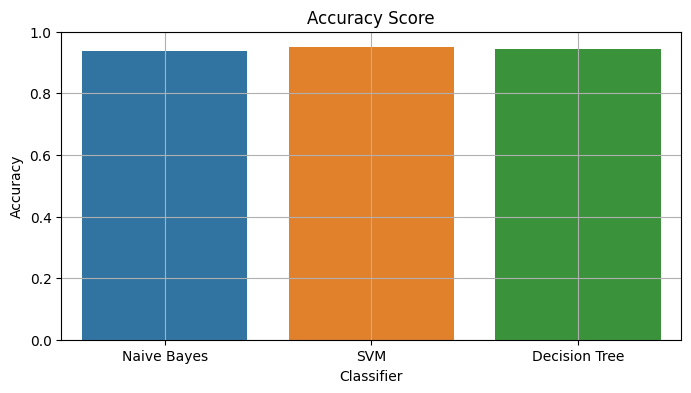

In [12]:
# Accuracy score visualization
accuracies = [accuracy_score(y_test, nb_predictions),
              accuracy_score(y_test, svm_predictions),
              accuracy_score(y_test, dt_predictions)]

plt.figure(figsize=(8, 4))
sns.barplot(x=classifiers, y=accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from gensim.models import Word2Vec, FastText


# Load the dataset
data = pd.read_csv('/content/train.csv')  # Replace 'customer_review.csv' with your dataset file

# Convert labels to the appropriate data type
data['label'] = data['label'].astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.2, random_state=42)



In [16]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent length
max_sequence_length = max([len(sequence) for sequence in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)


In [17]:
# Word Embedding - Word2Vec
word2vec_model = Word2Vec(sentences=X_train_sequences, vector_size=100, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv.key_to_index:
        embedding_matrix[i] = word2vec_model.wv[word]

# Word Embedding - FastText
fasttext_model = FastText(sentences=X_train_sequences, vector_size=100, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv.key_to_index:
        embedding_matrix[i] = fasttext_model.wv[word]


In [18]:
# Define the BI-LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
# Train the model
model.fit(X_train_padded, y_train.astype(float), validation_data=(X_test_padded, y_test.astype(float)), epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test.astype(float), verbose=0)
print("Accuracy:", accuracy)




Epoch 1/10
400/400 [==============================] - 27s 68ms/step - loss: 0.2535 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 2/10
400/400 [==============================] - 25s 63ms/step - loss: 0.2538 - accuracy: 0.9301 - val_loss: 0.2576 - val_accuracy: 0.9287
Epoch 3/10
400/400 [==============================] - 26s 65ms/step - loss: 0.2537 - accuracy: 0.9301 - val_loss: 0.2576 - val_accuracy: 0.9287
Epoch 4/10
400/400 [==============================] - 25s 63ms/step - loss: 0.2537 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 5/10
400/400 [==============================] - 25s 63ms/step - loss: 0.2538 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 6/10
400/400 [==============================] - 25s 63ms/step - loss: 0.2538 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 7/10
400/400 [==============================] - 26s 66ms/step - loss: 0.2535 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.utils import plot_model


In [ ]:
# Load the dataset
data = pd.read_csv('/content/customer_review.csv')
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text and determine the maximum sequence length
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)
max_length = max(max(len(x) for x in X_train_encodings['input_ids']), max(len(x) for x in X_test_encodings['input_ids']))


In [ ]:
# Re-tokenize with adjusted max_length
X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=max_length)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=max_length)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_1': X_train_encodings['input_ids'],
        'input_2': X_train_encodings['attention_mask'],
    },
    y_train.astype(float)
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_1': X_test_encodings['input_ids'],
        'input_2': X_test_encodings['attention_mask'],
    },
    y_test.astype(float)
))


In [ ]:
# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

# Build the transformer-based model
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_1')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_2')
embedding_layer = bert_model(input_ids, attention_mask=attention_mask)[0]
output_layer = tf.keras.layers.GlobalAveragePooling1D()(embedding_layer)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(output_layer)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output_layer)


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_dataset.shuffle(1000).batch(16),
          epochs=3,
          batch_size=16,
          validation_data=test_dataset.shuffle(1000).batch(16))

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset.batch(16), verbose=0)
print("Accuracy:", accuracy)

#plot
plot_model(model, to_file='model.png', show_shapes=True)
